# Map of Covid-19 Cases in São Paulo - Brazil

Este caderno é direcionado à produção de um mapa das mortes e casos em todo o estado devido ao Covid-19.


Como principal fonte de dados, usaremos os dados oficiais da Secretaria de Saúde do Estado, disponibilizados em https://www.seade.gov.br/coronavirus/.

Para os limites municipais, usaremos o conjunto de dados de municípios de São Paulo do catálogo de dados do Banco Mundial (https://datacatalog.worldbank.org/dataset/sao-paulo-municipalities) 


In [1]:
%load_ext pycodestyle_magic

In [2]:
%flake8_on

In [3]:
import earthpy as et
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd
import ssl

In [4]:
ssl._create_default_https_context = ssl._create_unverified_context
covid_por_municipio = pd.read_csv(
    "http://www.seade.gov.br/wp-content/uploads/" +
    "2020/05/Dados-covid-19-municipios.csv",
    sep=";",
    encoding="latin")

covid_por_municipio.head(4)

,Cod_IBGE,Grande região,Município,Mun_Total de casos,Mun_Total de óbitos,Unnamed: 5,Unnamed: 6
0,3500105.0,Interior,Adamantina,11,0,NaN,NaN
1,3500204.0,Interior,Adolfo,1,0,NaN,NaN
2,3500303.0,Interior,Aguaí,15,3,NaN,NaN
3,3500402.0,Interior,Águas da Prata,1,0,NaN,NaN


In [5]:
# Importando o shapefile com geopandas

mapa_de_sp = gpd.read_file("shapefiles/sao_paulo.shp")

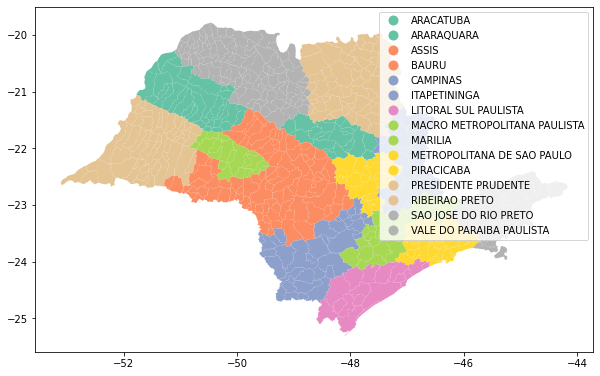

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plotando o mapa só para ver como fica

mapa_de_sp.plot(column='NOMEMESO',
                categorical=True,
                legend=True,
                figsize=(10, 6),
                markersize=45,
                cmap="Set2",
                ax=ax)

In [7]:
mapa_de_sp["CODMUNIC"] = mapa_de_sp["CODMUNIC"].astype(float)

mapa_sp_com_dados = mapa_de_sp.merge(covid_por_municipio,
                                     left_on="CODMUNIC",
                                     right_on="Cod_IBGE",
                                     how="left")


mapa_sp_com_dados["CODMUNIC"]


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
645    3556305.0
646    3557105.0
647    3557154.0
648    3557204.0
649    3557303.0
Name: CODMUNIC, Length: 650, dtype: float64

In [8]:
mapa_sp_com_dados["Mun_Total de óbitos"] = mapa_sp_com_dados["Mun_Total de óbitos"].fillna(0)
mapa_sp_com_dados["Mun_Total de casos"] = mapa_sp_com_dados["Mun_Total de casos"].fillna(0)

mapa_sp_com_dados["obitos_categorizados"] = pd.cut(mapa_sp_com_dados["Mun_Total de óbitos"],
                                                   bins=[-1, 1, 3,
                                                         6, 10, 50,
                                                         200, 100000000],
                                                   labels=["a) 0",
                                                           "b) 1-3",
                                                           "c) 4-6",
                                                           "d) 6-10",
                                                           "e) 11-50",
                                                           "f) 51-200",
                                                           "g) >201"])

mapa_sp_com_dados["casos_categorizados"] = pd.cut(mapa_sp_com_dados["Mun_Total de casos"],
                                                  bins=[-1, 1, 10,
                                                        50, 500, 1000,
                                                        100000000],
                                                  labels=["a) 0",
                                                          "b) 1-10",
                                                          "c) 11-50",
                                                          "d) 51-500",
                                                          "e) 501-1000",
                                                          "f) >1000"])

1:80: E501 line too long (93 > 79 characters)
2:80: E501 line too long (91 > 79 characters)
4:80: E501 line too long (92 > 79 characters)
16:80: E501 line too long (90 > 79 characters)


In [9]:
# Encontrando a data da tabela
# Assumindo que a tabela do estado e a tabela do município são atualizadas ao mesmo tempo

ssl._create_default_https_context = ssl._create_unverified_context
dados_de_covid_do_estado = pd.read_csv(
    "http://www.seade.gov.br/wp-content/" +
    "uploads/2020/05/Dados-covid-19-estado.csv",
    sep=";",
    encoding="latin")

dados_de_covid_do_estado.head(4)


,Data,Total de casos,Casos por dia,Óbitos por dia,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,26 fev,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,27 fev,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,28 fev,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,29 fev,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


2:80: E501 line too long (89 > 79 characters)


In [10]:

datas_registradas = dados_de_covid_do_estado["Data"][dados_de_covid_do_estado["Data"].notnull()]

data_dos_dados = datas_registradas.values[-1]
data_dos_dados_sem_espaco = data_dos_dados.replace(" ", "_")

2:80: E501 line too long (96 > 79 characters)


In [11]:
def plote_mapa_de_sp_com_dados(tabela_geopandas, coluna_dos_dados):
    fig, ax = plt.subplots()
    ax = tabela_geopandas.plot(column=coluna_dos_dados,
                               categorical=True,
                               legend=True,
                               figsize=(10, 6),
                               markersize=45,
                               cmap="Reds",
                               edgecolor='k',
                               linewidth=0.1,
                               ax=ax)

# Removendo os eixos x e y para ficar mais bonitinho
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)


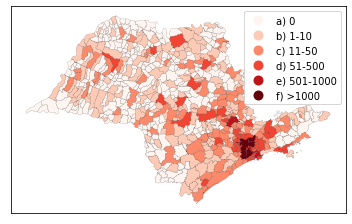

In [12]:
plote_mapa_de_sp_com_dados(mapa_sp_com_dados, "casos_categorizados")
arquivo_figura_casos = "fig/casos_sp_" + data_dos_dados_sem_espaco + ".png"
plt.savefig(arquivo_figura_casos, dpi=300, transparent=True)

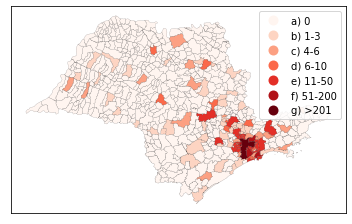

In [13]:
plote_mapa_de_sp_com_dados(mapa_sp_com_dados, "obitos_categorizados")
arquivo_figura_obitos = "fig/obitos_sp_" + data_dos_dados_sem_espaco + ".png"
plt.savefig(arquivo_figura_obitos, dpi=300, transparent=True)


In [14]:
import datetime
from datetime import date, timedelta

today = date.today()
today_in_wikidata_format = today.strftime("+%Y-%m-%dT00:00:00Z/11")

today_in_commons_format = today.strftime("%Y-%m-%d")

print(today_in_commons_format)

2020-05-10


In [16]:
# Auto commons upload via pywikibot
# pip3 install pywikibot
# set config file as described in
# https://www.mediawiki.org/wiki/
# Manual:Pywikibot/user-config.py#ExampleBot_on_Commons

place = "estado de São Paulo"
data_dos_dados = data_dos_dados


# See above for the definition.

descrevendo_obitos = '''=={{int:filedesc}}==
{{Information
|description={{pt|1=Óbitos por COVID-19 por município no ''' + place + "até o dia " + data_dos_dados + ''' de 2020.
Gráfico em Python gerado a partir dos dados de [https://www.seade.gov.br/coronavirus/].
Script disponível em github.com/lubianat/wikidata_covid19/tree/master/sandbox/distribution_maps}}.
|date=''' + today_in_commons_format + '''
|source={{own}}
|author=[[User:TiagoLubiana|TiagoLubiana]]
|permission=
|other versions=
}}

=={{int:license-header}}==
{{self|cc-by-sa-4.0}}

[[Category:Maps about the COVID-19 pandemic in São Paulo (state)]]
'''


arquivo_descrevendo_obitos = "fig/description_deaths_" + data_dos_dados_sem_espaco + ".txt"

file1 = open(arquivo_descrevendo_obitos, "w")
file1.write(descrevendo_obitos)
file1.close()


descrevendo_casos = '''=={{int:filedesc}}==
{{Information
|description={{pt|1=Casos de COVID-19 por município no ''' + place + " até o dia " + data_dos_dados + ''' de 2020.
Gráfico em Python gerado a partir dos dados de [https://www.seade.gov.br/coronavirus/].
Script disponível em github.com/lubianat/wikidata_covid19/tree/master/sandbox/distribution_maps}}.
|date=''' + today_in_commons_format + '''
|source={{own}}
|author=[[User:TiagoLubiana|TiagoLubiana]]
|permission=
|other versions=
}}

=={{int:license-header}}==
{{self|cc-by-sa-4.0}}

[[Category:Maps about the COVID-19 pandemic in São Paulo (state)]]
'''

arquivo_descrevendo_casos = "fig/description_cases_" + data_dos_dados_sem_espaco + ".txt"

print(descrevendo_casos)
file2 = open(arquivo_descrevendo_casos, "w")
file2.write(descrevendo_casos)
file2.close()


16:80: E501 line too long (87 > 79 characters)
17:80: E501 line too long (98 > 79 characters)
32:80: E501 line too long (91 > 79 characters)
42:80: E501 line too long (87 > 79 characters)
43:80: E501 line too long (98 > 79 characters)
57:80: E501 line too long (89 > 79 characters)


=={{int:filedesc}}==
{{Information
|description={{pt|1=Casos de COVID-19 por município no estado de São Paulo até o dia 9 mai de 2020.
Gráfico em Python gerado a partir dos dados de [https://www.seade.gov.br/coronavirus/].
Script disponível em github.com/lubianat/wikidata_covid19/tree/master/sandbox/distribution_maps}}.
|date=2020-05-10
|source={{own}}
|author=[[User:TiagoLubiana|TiagoLubiana]]
|permission=
|other versions=
}}

=={{int:license-header}}==
{{self|cc-by-sa-4.0}}

[[Category:Maps about the COVID-19 pandemic in São Paulo (state)]]



In [ ]:
# Change your Wikimedia user name in the user-config.py
# code for command line (interactive):

command_cases = "yes N | python3 upload.py -keep -filename " + arquivo_figura_casos + ' -summary:"updating status for today"' + " $(cat " + arquivo_descrevendo_casos + ")"
command_deaths = "yes N | python3 upload.py -keep -filename " + arquivo_figura_obitos + ' -summary:"updating status for today"' + " $(cat " + arquivo_descrevendo_obitos + ")"


print(command_cases)
print(command_deaths)

! $command_cases
! $command_deaths

yes N | python3 upload.py -keep -filename fig/casos_sp_9_mai.png -summary:"updating status for today" $(cat fig/description_cases_9_mai.txt)
yes N | python3 upload.py -keep -filename fig/obitos_sp_9_mai.png -summary:"updating status for today" $(cat fig/description_deaths_9_mai.txt)
/home/lubianat/.local/lib/python3.6/site-packages/pywikibot/config2.py:1091: UserWarning: 
Configuration variable "use_api_login" is defined in your user-
config.py but unknown. It can be a misspelled one or a variable that
is no longer supported.
  'supported.'.format(name)), UserWarning)
['fig/casos_sp_9_mai.png']
The suggested description is:
=={{int:filedesc}}== {{Information |description={{pt|1=Casos de COVID-19 por município no estado de São Paulo até o dia 9 mai de 2020. Gráfico em Python gerado a partir dos dados de [https://www.seade.gov.br/coronavirus/]. Script disponível em github.com/lubianat/wikidata_covid19/tree/master/sandbox/distribution_maps}}. |date=2020-05-10 |source={{own}} |author=[[Use

In [ ]:
# Now add via quickstatements ? TO BE DONE|

# Get current maps:

from wikidataintegrator import wdi_core

my_first_wikidata_item = wdi_core.WDItemEngine(wd_item_id='Q89713663')

In [ ]:
commons_file_casos = "casos_sp_" + data_dos_dados_sem_espaco + ".png"
commons_file_obitos = "obitos_sp_" + data_dos_dados_sem_espaco + ".png"


def print_removing_map_statements(claim_property):
    value = (claim_property["mainsnak"]["datavalue"]["value"])
    if value != commons_file_casos and value != commons_file_obitos:
        print(" -Q89713663|P1846|" + '"' + value + '"')


[print_removing_map_statements(i) for i in my_first_wikidata_item.get_wd_json_representation()["claims"]["P1846"]]

reference = '|S854|"https://www.seade.gov.br/coronavirus/"' + "|S813|" + today_in_wikidata_format

start_date = '|P585|' + '+2020-04-' + data_dos_dados[:2] + 'T00:00:00Z/11'

print(" Q89713663|P1846|" + '"' + commons_file_casos + '"' + start_date + reference)
print(" Q89713663|P1846|" + '"' + commons_file_obitos + '"' + start_date + reference)      